In [21]:
# imports
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
# plotting
import seaborn as sns
plt.rcParams['font.family'] = 'monospace'   # Fonts
plt.rcParams['font.monospace'] = 'DejaVu Sans Mono'
sns.set_context("talk")

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.visualization import ImageNormalize
from astropy.visualization.stretch import AsinhStretch
norm = ImageNormalize(stretch=AsinhStretch())

In [65]:
platescale_m = 7.95
platescale_n = 0.009952*1000

In [46]:
nirc2img = fits.getdata('tet1OriB/n0746_distorcorr.fits')
magaoimg = fits.getdata('tet1OriB/Theta1_Ori_B_2018-04-26_darksub_cube_subdivtest0_nohp.fit')

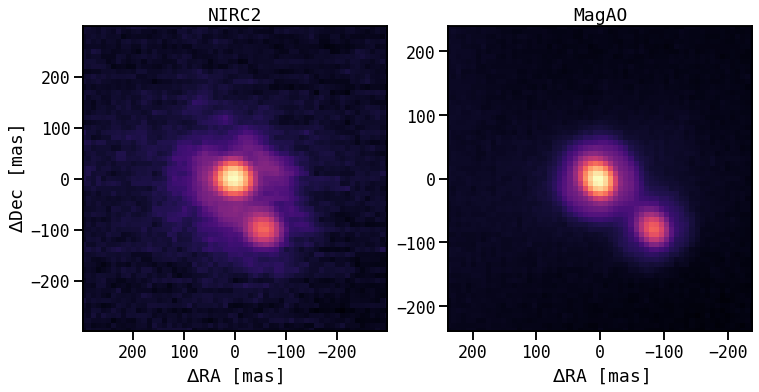

In [80]:
fig, axes = plt.subplots(1,2, figsize=(12,6), facecolor='white')

b = magaoimg[150:300,150:300]
i,j = np.unravel_index(b.argmax(), b.shape)
axes[1].imshow(b,norm=ImageNormalize(stretch=AsinhStretch()), origin='lower', cmap='magma')
axes[1].set_xlim(j-30, j+30)
axes[1].set_ylim(i-30, i+30)
axes[1].set_title('MagAO')

def pix2arcM(x):
    return (x-i) * platescale_m

def arc2pixM(x):
    return (x / platescale_m)+i

def negpix2arcM(x):
    return -(x-j) * platescale_m

def negarc2pixM(x):
    return -(x / platescale_m)+j

axes[1].tick_params(axis='x',
                    which='both',
                    bottom=False,
                    top=False,
                    labelbottom=False
                    )
axes[1].tick_params(axis='y',
                    which='both',
                    left=False,
                    right=False,
                    labelleft=False
                    )

secax = axes[1].secondary_xaxis('bottom', functions=(negpix2arcM, negarc2pixM))
secay = axes[1].secondary_yaxis('left', functions=(pix2arcM, arc2pixM))
secax.set_xlabel(r'$\Delta$RA [mas]')
# secay.set_ylabel(r'$\Delta$Dec [mas]')


a = nirc2img[150:250,850:950]
k,m = np.unravel_index(a.argmax(), a.shape)
axes[0].imshow(a, norm=ImageNormalize(stretch=AsinhStretch()), cmap='magma')
axes[0].set_xlim(m-30, m+30)
axes[0].set_ylim(k-30, k+30)

axes[0].set_title('NIRC2')

def pix2arcN(x):
    return (x-k) * platescale_n

def arc2pixN(x):
    return (x / platescale_n)+k

def negpix2arcN(x):
    return -(x-m) * platescale_n

def negarc2pixN(x):
    return -(x / platescale_n)+m

axes[0].tick_params(axis='x',
                    which='both',
                    bottom=False,
                    top=False,
                    labelbottom=False
                    )
axes[0].tick_params(axis='y',
                    which='both',
                    left=False,
                    right=False,
                    labelleft=False
                    )

secax2 = axes[0].secondary_xaxis('bottom', functions=(negpix2arcN, negarc2pixN))
secay2 = axes[0].secondary_yaxis('left', functions=(pix2arcN, arc2pixN))
secax2.set_xlabel(r'$\Delta$RA [mas]')
secay2.set_ylabel(r'$\Delta$Dec [mas]')

plt.savefig('tet1orib2b3_ex.pdf', dpi=300, bbox_inches="tight")